## Stochastic Discount Factor

#### Suppose that consumption growth has a lognormal distribution with the possibility of rare disasters:

$$ ln\tilde{g} =0.02+0.02\tilde{\epsilon} +\tilde{\nu} $$

#### Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

### Q1. Simulate ε with (at least) $10^4$ random draws from a standard normal distribution, and simulate ν with (at least) $10^4$ random draws from a standard uniform distribution. 

In [1]:
!pip install pynverse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynverse import inversefunc

In [3]:
epsilon = np.random.normal(0,1,10000)
x = np.random.uniform(0,1,10000)
nu = []
for i in range(10000):
    if x[i] <= 0.017:
        nu.append(np.log(0.65))
    else:
        nu.append(0)
        
g = np.exp(0.02 + 0.02 * np.array(epsilon) + np.array(nu))

### Q2. Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility:

$$ \tilde{M} =0.99\tilde{g} ^{−\gamma} $$

#### for γ in the range [1,4], in increments of 0.1 (or less).

In [4]:
gamma = np.linspace(1,4,31)
for i in range(31):
    M = 0.99 * np.array(g) **(-gamma[i])

### Q3. Calculate the mean and standard deviation of the pricing kernel for each values of γ, and plot the ratio σm/μm (on the vertical axis) vs γ (on the horizontal axis).

In [5]:
sigma_M = []
mean_M = []

for i in range(301):
    M = 0.99 * np.array(g) **(-gamma[i])
    sigma_M.append(np.std(np.array(M)))
    mean_M.append(np.mean(np.array(M)))
    
y = [i / j for i,j in zip(sigma_M,mean_M)]

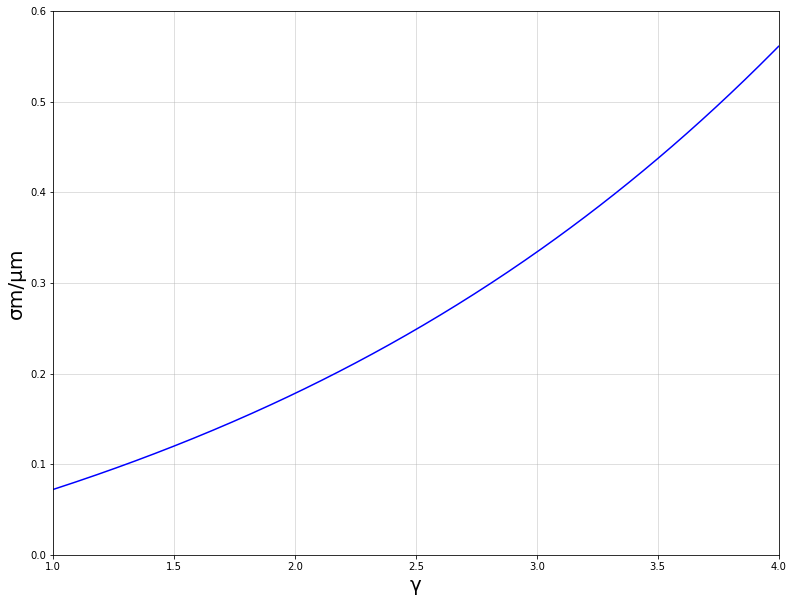

In [18]:
fig, ax = plt.subplots(figsize = (13, 10))
ax.plot(gamma, y, color = 'blue')
ax.grid(True, alpha = 0.5)
ax.set_xlabel("γ", fontsize = 20)
ax.set_ylabel("σm/μm", fontsize = 20)    
ax.set_xlim(1, 4)
ax.set_ylim(0, 0.6)

plt.show()

### Q4. Take note of the smallest value of γ for which σm/μm > 0.4 (i.e., for which the Hansen–Jagannathan bound is satisfied).

In [7]:
params = np.polyfit(gamma, y, 10)
param_func = np.poly1d(params)
inversefunc(param_func, y_values = 0.4)

array(3.32976568)

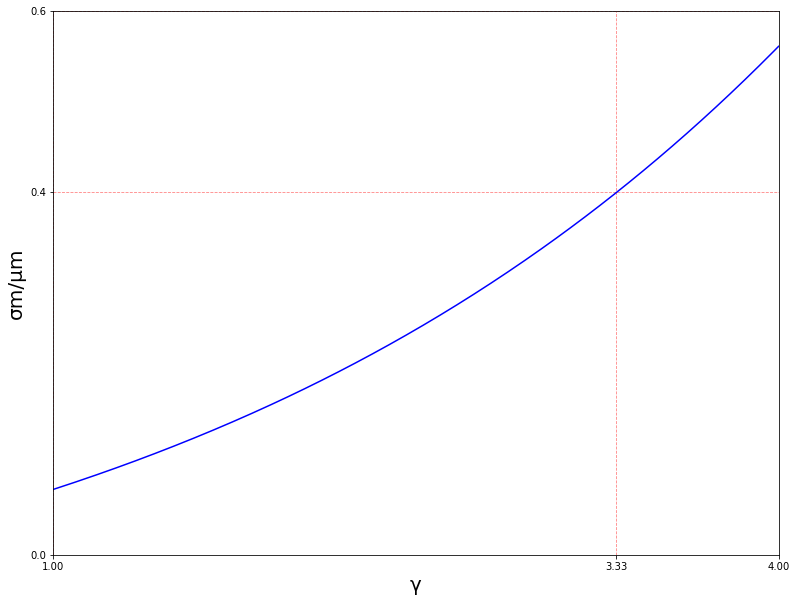

In [19]:
y_predict = param_func(gamma)

fig, ax = plt.subplots(figsize = (13, 10))
ax.plot(gamma, y, color = 'blue')
ax.grid(True, alpha = 0.5, color = "r", linestyle = "--")
ax.set_xlabel("γ", fontsize = 20)
ax.set_ylabel("σm/μm", fontsize = 20)
ax.set_xlim(1, 4)
ax.set_ylim(0, 0.6)
ax.set_xticks([1,3.329,4])
ax.set_yticks([0,0.4,0.6])

plt.show()

### Take note of the smallest value of γ > 3.3297 for which σm/μm > 0.4.

### Q5. Briefly explain the economic significance of this result.

> In the Consumption CAMP model, Hansen-Jagannathan bound states that the pricing kernel nust be at least as big as the Sharpe ratio of a portfolio, in other words, the standard deviation of a stochastic discount factor to its mean must be as big as the highest Sharpe ratio of the portfolio. 

> According to the historical data, the U.S. stock market has a Sharpe ratio of 0.4. Therefore, the volatility of pricing kernel must be more than 0.4. If we assume investors have power utility, the bound is satisfied with a gamma value of around 3.3, which is reasonably low level of relative risk aversion, given that we factor rare disasters in optimal consumption growth.

* When investor has power utility, Sharpe ratio of market portfolio can be used to derive lower bound on investor's coefficient of relative risk aversion.

* Distribution of consumption growth becomes highly skewed (to the left) when rare disasters are included.

* H–J bound is satisfied for reasonably low level of relative risk aversion, so no equity premium puzzle.